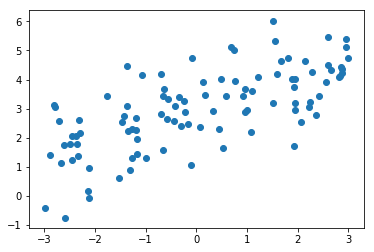

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.uniform(-3.0, 3.0, 100)
X = x.reshape(-1,1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)
plt.scatter(x, y)
plt.show()

# 1.不用模型正则化的多项式回归

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
Lin_reg = LinearRegression()

def polyReg(degree):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                     ("std_scaler", StandardScaler()),
                     ("lin_reg", Lin_reg)
    ])

def plot_model(model):
    
    x_plot = np.linspace(-3.0, 3.0, 100).reshape(-1,1)
    y_plot = model.predict(x_plot)
    
    plt.scatter(x, y)
    plt.plot(x_plot , y_plot, color='r')
    plt.axis([-3.0, 3.0, 0, 6])
    plt.show()

degree = 20

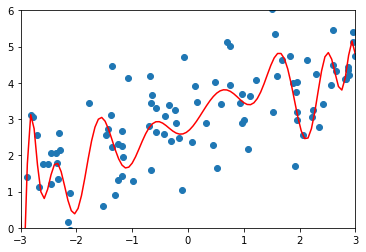

In [5]:
poly_reg20 = polyReg(degree = 20)
poly_reg20.fit(X_train, y_train)
plot_model(poly_reg20)

In [7]:
from sklearn.metrics import mean_squared_error

y_test_predict20 = poly_reg20.predict(X_test)
mse_test20 = mean_squared_error(y_test, y_test_predict20)
mse_test20

1.1445464900178017

In [8]:
y_train_predict20 = poly_reg20.predict(X_train)
mse_train20 = mean_squared_error(y_train, y_train_predict20)
mse_train20

0.6193868423643291

degree = 40

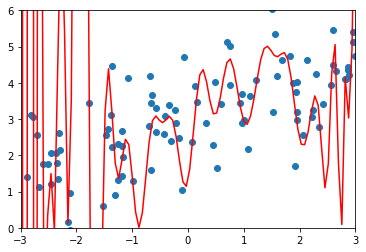

In [9]:
poly_reg40 = polyReg(degree = 40)
poly_reg40.fit(X_train, y_train)
plot_model(poly_reg40)

In [10]:
y_test_predict40 = poly_reg40.predict(X_test)
mse_test40 = mean_squared_error(y_test, y_test_predict40)
mse_test40

1648.4676849179782

In [11]:
y_train_predict40 = poly_reg40.predict(X_train)
mse_train40 = mean_squared_error(y_train, y_train_predict40)
mse_train40

0.3264346939259324

显然, 无论 degree = 20 还是 degree = 40，数据都过拟合了.   
下面, 用LASSO 进行模型的正则化

# LASSO

In [20]:
from sklearn.linear_model import Lasso

def LassoReg(degree, alpha):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                     ("std_scaler", StandardScaler()),
                     ("Lasso_reg", Lasso(alpha=alpha))
    ])



degree = 40, alpha=0.001

/home/crystal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


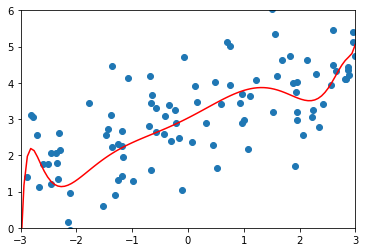

In [21]:
Lasso_reg1 = LassoReg(degree=40, alpha=0.001)
Lasso_reg1.fit(X_train, y_train)
plot_model(Lasso_reg1)

与为进行模型正则化的情况相比, 曲线是不是平滑了许多？

In [13]:
y_test_predict1 = Lasso_reg1.predict(X_test)
mse_test_lasso1 = mean_squared_error(y_test, y_test_predict1 )
mse_test_lasso1

0.9953538515564533

与为进行模型正则化相比，测试数据的均方误差从1648.4676849179782 下降到了 0.9953538515564533

degree=40, alpha=0.01

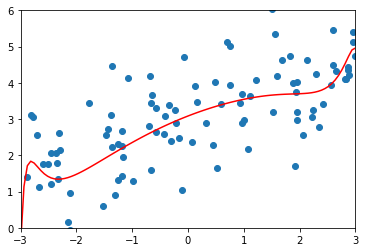

In [17]:
Lasso_reg2= LassoReg(degree=40, alpha=0.01)
Lasso_reg2.fit(X_train, y_train)
plot_model(Lasso_reg2)

In [19]:
y_test_predict2 = Lasso_reg2.predict(X_test)
mse_test_lasso2 = mean_squared_error(y_test, y_test_predict2)
mse_test_lasso2

0.9440612134710971

degree=40, alpha=0.1

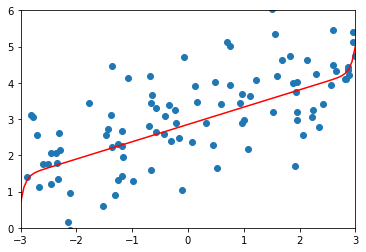

In [23]:
Lasso_reg3= LassoReg(degree=40, alpha=0.1)
Lasso_reg3.fit(X_train, y_train)
plot_model(Lasso_reg3)

In [24]:
y_test_predict3 = Lasso_reg3.predict(X_test)
mse_test_lasso3 = mean_squared_error(y_test, y_test_predict3)
mse_test_lasso3

0.9237249674182835

degree=40, alpha=1

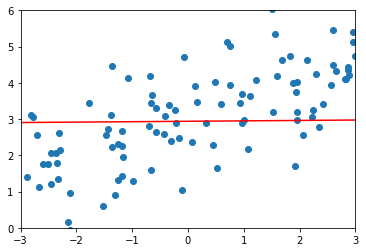

In [25]:
Lasso_reg4= LassoReg(degree=40, alpha=1)
Lasso_reg4.fit(X_train, y_train)
plot_model(Lasso_reg4)

In [26]:
y_test_predict4 = Lasso_reg4.predict(X_test)
mse_test_lasso4 = mean_squared_error(y_test, y_test_predict4)
mse_test_lasso4

1.2600202612809985

以上几个例子均是 degree = 40, alpha = 0.001 ——0.01时, 随着正则化强度的上升, 测试数据集的均方误差逐渐减小,说明 模型的泛化能力逐渐变强   
当 degree = 40, alpha = 1时, 测试数据集的均方误差不降反增, 说明此时正则化“过头了”,alpha 过大,导致了许多特征的权重（系数）为0, 把重要特征前的系数也置0了.